# Recommendations with IBM

This notebook include codes I have written to aplly different recommendation methods in building a  recommendation system using
real data from  the IBM Watson Studio platform. The methds applied incude: rank-based recommendations, user-user based collaborative
filtering, and matrix factorization technique using machine learning method of Single Value Decomposition. There are two datasets
provided: the'user-item-interactions.csv' and the 'articles_comminity.csv' datasets. The former contains all the interactions of
all users with the different articles on the IBM platform. Interactions here mean maybe 'Read', and the later incldue the contents
of the articles such as the description,name, the body, and status for every article id provided on the platform. I applied 
exploratory analysis to get a good understanding of the datasets, and good ETL techniques in getting the right datasets to work
with for different pusrpose.

## Table of Contents

    I. Exploratory Data Analysis/ETL
    II. Rank Based Recommendations
    III. User-User Based Collaborative Filtering
    IV. Matrix Factorization (Single Value Decomposition)
    V. Conclusion

### <a class="anchor" id="Rank">Part I: Exploratory Data Analysis/ETL</a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import project_tests as t
import pickle

%matplotlib inline

df = pd.read_csv('user-item-interactions.csv')
df_content = pd.read_csv('articles_community.csv')
del df['Unnamed: 0']
del df_content['Unnamed: 0']

# Show df to get an idea of the data
df.head()

,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [14]:
df.shape#shape of original dataset

(45993, 3)

In [15]:
df['email'].isnull().sum()#Number of NANs in the email column/invalid interactions

17

In [16]:
df['title'].isnull().sum()#Number of nans in the title column

0

In [20]:
df['article_id'].isnull().sum()#Number of nans in the article-id column

0

In [18]:
df1 = df[~df['email'].isnull()]#Remove the null contents

In [19]:
df1.shape#shape of the new dataset with null elements removed

(45976, 3)

In [22]:
#df1['article_id'].value_counts()#

In [23]:
users = df1['email'].unique()#Users -number of unique users

In [24]:
len(users)

5148

In [4]:
df1.shape

(45976, 3)

In [27]:
df3 = df1[~df1.duplicated(['email','title'])]#taking away all the duplicated interactions

In [28]:
df3.shape

(33669, 3)

In [30]:
#df1[df1['article_id'].duplicated]

In [29]:
len(df['article_id'].unique())#Total Nuber of articles reviewed

714

In [4]:
#user_artic = df1.pivot(index = 'email', columns = 'article_id')['title']

In [18]:
#df[df['article_id'] == 1427.0][['title','email']]

In [2]:
# Show df_content to get an idea of the data
df_content.head()

,doc_body,doc_description,doc_full_name,doc_status,article_id
0,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0
1,No Free Hunch Navigation * kaggle.com\r\n\r\n ...,"See the forest, see the trees. Here lies the c...",Communicating data science: A guide to present...,Live,1
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...,Here’s this week’s news in Data Science and Bi...,"This Week in Data Science (April 18, 2017)",Live,2
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...",Learn how distributed DBs solve the problem of...,DataLayer Conference: Boost the performance of...,Live,3
4,Skip navigation Sign in SearchLoading...\r\n\r...,This video demonstrates the power of IBM DataS...,Analyze NY Restaurant data using Spark in DSX,Live,4


In [37]:
df_content['article_id'].duplicated().sum()#how many duplicated articles

5

In [38]:
df_content.shape

(1056, 5)

In [ ]:
### <a class="anchor" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</a>

Use the dictionary and cells below to provide some insight into the descriptive statistics of the data.

`1.` What is the distribution of how many articles a user interacts with in the dataset?  Provide a visual and descriptive statistics to assist with giving a look at the number of times each user interacts with an article.  

In [43]:
df.head()

,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [42]:
df.loc[2,'title']

'use deep learning for image classification'

In [45]:
df[df['title'] == 'use deep learning for image classification']['email'].count()

937

In [28]:
#df[df['title'] == 'use deep learning for image classification']['email'].value_counts()

In [18]:
df_count = df1['email'].value_counts()

In [56]:
df1['email'].value_counts().sum()

45976

In [34]:
#Trying to create a user_item dataframe using df1

In [33]:
df1['COUNTER'] =1 
dfNew = df1.groupby(['email', 'article_id']).count().reset_index()
#NewU_A = dfNew.pivot(index = 'email', columns = 'article_id')['title']

C:\Users\chiji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
NewU_A = dfNew.pivot(index = 'email', columns = 'article_id')['title']#User_article dataset

In [37]:
NewU_A.head(10)

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
email,,,,,,,,,,,,,,,,,,,,,
0000b6387a0366322d7fbfc6434af145adf7fed1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001055fc0bb67f71e8fa17002342b256a30254cd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00148e4911c7e04eeff8def7bbbdaf1c59c2c621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001a852ecbd6cc12ab77a785efa137b2646505fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001fc95b90da5c3cb12c501d201a915e4f093290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0042719415c4fca7d30bd2d4e9d17c5fc570de13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00772abe2d0b269b2336fc27f0f4d7cb1d2b65d7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
008ba1d5b4ebf54babf516a2d5aa43e184865da5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
008ca24b82c41d513b3799d09ae276d37f92ce72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### The above show a user-item matrix which has the title of the article whnever there is an interaction, and a NaN where
#### there is no interaction.

In [38]:
#df_count
articles = list(NewU_A.columns)#List of article ids

In [39]:
def isnan(value):
  try:
      import math
      return math.isnan(float(value))
  except:
      return False
def article_read2(col):
    '''
    This creates a dictionary of article ids and the number of views/interactions 
    INPUT:
    article id - 
    OUTPUT:
   sumV_article - the sum of views for the artciles
    '''
    i_watched1 = []
    i_watched2 = [i_watched1.append(j) for i, j in NewU_A.loc[:,col].items() if not isnan(j)]
    sumV_article = np.sum(i_watched1)
    return sumV_article
article_users = {}
for i in articles:
    article_users[i] = article_read2(i)

In [40]:
##creat a  key from each article id, and use that to covert the dictionary above to a dataframe
keyss2 = []
for i, j in article_users.items():
    keyss2.append(i)
user_art2 = pd.DataFrame(list(article_users.items()), index=keyss2)#Put a dict in dataframe

In [41]:
user_art2.head(5)

,0,1
0.0,0.0,14.0
2.0,2.0,58.0
4.0,4.0,13.0
8.0,8.0,85.0
9.0,9.0,10.0


In [42]:
user_art2[1].max()#max views of any article

937.0

In [43]:
user_art2[user_art2[1] == 937][0]#article id of the max viewed

1429.0    1429.0
Name: 0, dtype: float64

In [44]:
user_art2.rename( columns = {0:'Article', 1:'Number of views'}, inplace = True)

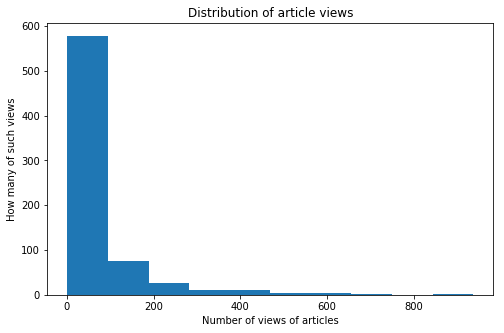

In [45]:
user_art2['Number of views'].plot(kind='hist', figsize=(8, 5))

plt.title('Distribution of article views') # add a title to the histogram
plt.ylabel('How many of such views') # add y-label
plt.xlabel('Number of views of articles') # add x-label

plt.show()

In [46]:
def isnan(value):
  try:
      import math
      return math.isnan(float(value))
  except:
      return False
def articles_read(user_id):
    '''
    This creates a dictionary of user_ids and the number of articles it has interacted with
    INPUT:
    user_id - the user_id of an individual as email
    OUTPUT:
   num_article - the number of artciles the user has interacted
    '''
    i_watched1 = []
    i_watched2 = [i_watched1.append(i) for i, j in NewU_A.loc[user_id,:].items() if not isnan(j)]
    num_article = len(i_watched1)
    return num_article
user_articles = {}
for i in users:
    user_articles[i] = articles_read(i)

In [49]:
user_art1 = pd.DataFrame(list(user_articles.items()), index=users)#Put a dict in dataframe

In [50]:
user_art1.head()

,0,1
ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7,ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7,36
083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b,6
b96a4f2e92d8572034b1e9b28f9ac673765cd074,b96a4f2e92d8572034b1e9b28f9ac673765cd074,40
06485706b34a5c9bf2a0ecdac41daf7e7654ceb7,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7,26
f01220c46fc92c6e6b161b1849de11faacd7ccb2,f01220c46fc92c6e6b161b1849de11faacd7ccb2,3


In [52]:
#Rename and sort this dataframe accroding to number of articles
user_art1.rename( columns = {0:'Users', 1:'Number of articles'}, inplace = True)
user_art1.sort_values(['Number of articles'], inplace = True, ascending = False, axis = 0)

In [53]:
user_art1['Number of articles'].sum()#

33669

In [54]:
user_art1.reset_index(inplace = True)

In [55]:
user_art1.head()

,index,Users,Number of articles
0,2b6c0f514c2f2b04ad3c4583407dccd0810469ee,2b6c0f514c2f2b04ad3c4583407dccd0810469ee,135
1,77959baaa9895a7e2bdc9297f8b27c1b6f2cb52a,77959baaa9895a7e2bdc9297f8b27c1b6f2cb52a,135
2,d9032ff68d0fd45dfd18c0c5f7324619bb55362c,d9032ff68d0fd45dfd18c0c5f7324619bb55362c,101
3,c60bb0a50c324dad0bffd8809d121246baef372b,c60bb0a50c324dad0bffd8809d121246baef372b,100
4,a37adec71b667b297ed2440a9ff7dad427c7ac85,a37adec71b667b297ed2440a9ff7dad427c7ac85,97


In [56]:
user_art1.shape[0]/2

2574.0

In [57]:
user_art1.iloc[2572,:]#Median

index                 d720a6f62f85913aad87678d7e73b39d603250b9
Users                 d720a6f62f85913aad87678d7e73b39d603250b9
Number of articles                                           3
Name: 2572, dtype: object

In [58]:
user_art1.iloc[2573,:]#Median

index                 b065abf79cdbc52c873b3f5082cc7f4874831416
Users                 b065abf79cdbc52c873b3f5082cc7f4874831416
Number of articles                                           3
Name: 2573, dtype: object

#### at least half of the users interacted with 3 articles or more

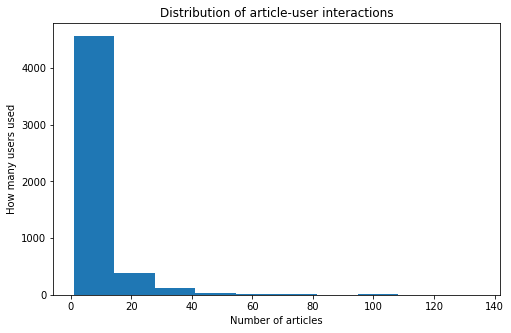

In [59]:
user_art1['Number of articles'].plot(kind='hist', figsize=(8, 5))

plt.title('Distribution of article-user interactions') # add a title to the histogram
plt.ylabel('How many users used') # add y-label
plt.xlabel('Number of articles') # add x-label

plt.show()

#####  Here is an `email_mapper` function that was deemed a reasonable way to map users to ids.  There were a small number of null values, and it was found that all of these null values likely belonged to a single user (which is how they are stored using the function below).

In [63]:
def email_mapper():
    '''
    map each email into a unique number which will serve as user id
    INPUT:
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    email_encoded - (list) A list of numbers (the usrer_ids) used to encode the different user emails 
    
    '''
    coded_dict = dict()
    cter = 1
    email_encoded = []
    
    for val in df['email']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        
        email_encoded.append(coded_dict[val])
    return email_encoded

email_encoded = email_mapper()
del df['email']
df['user_id'] = email_encoded

# show header of new df
df.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


### <a class="anchor" id="Rank">Part II: Rank-Based Recommendations</a>

In [64]:
def get_top_articles(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    # Your code here
    my_d = df.groupby('article_id', axis = 0).count().sort_values(by = ['title'], ascending = False)
    top_a = list(my_d['title'].index[:n].values)
    top_articles = df[df['article_id'].isin(top_a)]['title'].values
    return top_articles # Return the top article titles from df (not df_content)

def get_top_article_ids(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    # Your code here
    my_d = df.groupby('article_id', axis = 0).count().sort_values(by = ['title'], ascending = False)
    top_a = list(my_d['title'].index[:n].values)
    return top_a # Return the top article ids

In [5]:
print(get_top_articles(10))
print(get_top_article_ids(10))

['healthcare python streaming application demo'
 'use deep learning for image classification'
 'use deep learning for image classification' ...
 'insights from new york car accident reports'
 'visualize car data with brunel'
 'insights from new york car accident reports']
[1429.0, 1330.0, 1431.0, 1427.0, 1364.0, 1314.0, 1293.0, 1170.0, 1162.0, 1304.0]


### <a class="anchor" id="User-User">Part III: User-User Based Collaborative Filtering</a>


Recreate a new user-article dataframe using the new df with shape such that users are the rows and articles are the columns.  
  

* **If a user has interacted with an article, then place a 1 where the user-row meets for that article-column**.  It does not matter how many times a user has interacted with the article, all entries where a user has interacted with an article should be a 1.  


* **If a user has not interacted with an item, then place a zero where the user-row meets for that article-column**. 

In [67]:
# create the user-article matrix with 1's and 0's

def isnan(value):
    '''
    create a function to check any type of datatype  value whether it is a null/NaNs value
    INPUT:
    value - a given value/element
    
    OUTPUT:
    True/False - True if it is null/NaN, and False otherwise
    '''
    try:
        import math
        return math.isnan(float(value))
    except:
        return False
def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    dfNew = df.groupby(['user_id', 'article_id']).count().reset_index()
    NewU_A = dfNew.pivot(index = 'user_id', columns = 'article_id')['title']
    apply_1 = lambda x: 1 if not isnan(x) else 0#A lamda function to identify nan
    list_col = list(NewU_A.columns)
    for i in list_col:
        NewU_A.loc[:,i] = NewU_A.loc[:,i].apply(apply_1)
    user_item = NewU_A
    return user_item # return the user_item matrix 

user_item = create_user_item_matrix(df)

In [68]:
user_item.head()

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Using the above matrix, I can compute the similarity of diferent users based on the articles rhey have read/interacted with.
The function below will take a user_id and provide an ordered list of the most similar users to that user (from most similar to least similar).  The returned result will not contain the provided user_id, as  each user is similar to him/herself. Because the results for each user here are binary, it made sense to compute similarity as the dot product of two users.

In [69]:
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
    # compute similarity of each user to the provided user
    art1 = np.array(user_item.iloc[:,:])
    dot_art = np.dot(art1,np.transpose(art1))
    sim_i = dot_art[user_id,:]

    # sort by similarity
    i_dict = {}
    for i,j in enumerate(sim_i, start=1):
        i_dict[i] = j
    sorted_i = pd.Series(i_dict).sort_values(ascending = False)

    # create list of just the ids
    sorted_list = [i for i in list(sorted_i.index) if i != user_id]
    # remove the own user's id
    most_similar_users = sorted_list  
    return most_similar_users # return a list of the users in order from most to least similar

In [11]:
# Check the performance of the function
print("The 10 most similar users to user 1 are: {}".format(find_similar_users(1)[:10]))
print("The 5 most similar users to user 3933 are: {}".format(find_similar_users(3933)[:5]))
print("The 3 most similar users to user 46 are: {}".format(find_similar_users(46)[:3]))

The 10 most similar users to user 1 are: [2, 3764, 49, 98, 3697, 10, 2982, 21, 3782, 290]
The 5 most similar users to user 3933 are: [3934, 49, 126, 2742, 1062]
The 3 most similar users to user 46 are: [4527, 120, 3419]


Now that I have a function that provides the most similar users to each user, I want to use these users to find articles I can recommend to any user.

In [7]:
def get_article_names(article_ids, df=df):
    '''
    INPUT:
    article_ids - (list) a list of article ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the title column)
    '''
    article_names = df[df['article_id'].isin(article_ids)]['title'].values
    return set(article_names) # Return the article names associated with list of article ids


def get_user_articles(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    article_ids - (list) a list of the article ids seen by the user
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of the article_ids and article titles that have been seen by a user
    '''
    i_seen1 = []
    i_seen2 = [i_seen1.append(str(i)) for i, j in user_item.loc[user_id,:].items() if j == 1]
    article_names = set(get_article_names(i_seen1, df=df))
    article_ids = i_seen1
    return article_ids,article_names# return the ids and names


def user_user_recs(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    Users who are the same closeness are chosen arbitrarily as the 'next' user
    
    For the user where the number of recommended articles starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    '''
    similar_users = find_similar_users(user_id, user_item=user_item)
    seen = get_user_articles(user_id, user_item=user_item)[0]#Article id seen by this user
    nrec = 0
    while nrec < m:
        notseen = []
        for i in similar_users:
            iseen = get_user_articles(i, user_item=user_item)[0]#articleid seen by a given close user i
            diff = set(iseen).difference(seen)
            notseen1 = notseen.extend(diff)
            nrec += len(notseen)
            
    recids =  notseen[:m]
    #recs = get_article_names(recids, df=df)
    return recids#recs # return your recommendations for this user_id

In [9]:
# Check Results
get_article_names(user_user_recs(1, 10)) # Return 10 recommendations for user 1

{'520    using notebooks with pixiedust for fast, flexi...\nName: title, dtype: object',
 "a beginner's guide to variational methods",
 'analyzing streaming data from kafka topics',
 'build a python app on the streaming analytics service',
 'ensemble learning to improve machine learning results',
 'healthcare python streaming application demo',
 'practical tutorial on random forest and parameter tuning in r',
 'sparklyr — r interface for apache spark',
 'use r dataframes & ibm watson natural language understanding',
 'using deep learning to reconstruct high-resolution audio'}

In [ ]:
{'10 essential algorithms for machine learning engineers',
 'breast cancer wisconsin (diagnostic) data set',
 'build a python app on the streaming analytics service',
 'healthcare python streaming application demo',
 'insights from new york car accident reports',
 'learn basics about notebooks and apache spark',
 'the 3 kinds of context: machine learning and the art of the frame',
 'use r dataframes & ibm watson natural language understanding',
 'using deep learning to reconstruct high-resolution audio',
 'web picks (december 2017)'}

To improve the consistency of the **user_user_recs** function from above.  

* Instead of arbitrarily choosing when to obtain users who are all the same closeness to a given user - choose the users that have the most total article interactions before choosing those with fewer article interactions.


* Instead of arbitrarily choosing articles from the user where the number of recommended articles starts below m and ends exceeding m, choose articles with the articles with the most total interactions before choosing those with fewer total interactions.

In [71]:
def get_top_sorted_users(user_id, df=df, user_item=user_item):
    '''
    this basically can be used to replace the find_similar_users function
    INPUT:
    user_id - (int)
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item - (pandas dataframe) matrix of users by articles: 
            1's when a user has interacted with an article, 0 otherwise
    
            
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
                    neighbor_id - is a neighbor user_id
                    similarity - measure of the similarity of each user to the provided user_id
                    num_interactions - the number of articles viewed by the user - if a u
                    
    Other Details - sort the neighbors_df by the similarity and then by number of interactions where 
                    highest of each is higher in the dataframe
     
    '''
    #Similarity
    art1 = np.array(user_item.iloc[:,:])
    dot_art = np.dot(art1,np.transpose(art1))
    sim_i = dot_art[user_id,:]#Similarities computed for a given user

    # Create a dataframe with similarity, user_id, and number of interactions
    # then sort by similarity and number of interactions
    i_dict = {}
    indexes = []
    simi = []#List of similaritites for each user
    num_int = []#create a list of number of interactions for each user
    for i,j in enumerate(sim_i, start=1):
        num_art = len(get_user_articles(i, user_item=user_item)[0])#Findi the number of interactions
        num_int.append(num_art)
        indexes.append(i)
        simi.append(j)
        #i_dict[i] = [j]#get a list of similarity and number of interactions
    sorted_i = pd.DataFrame({'user_id': indexes,'similarity': simi,'num_interactions':num_int}).set_index(['user_id'])
    neighbors_df = sorted_i.sort_values(by = ['similarity','num_interactions'],ascending = False)
    # create list of just the ids
    #sorted_list = [i for i in list(sorted_i.index) if i != user_id]
    return neighbors_df# Return the dataframe specified in the doc_string

In [8]:
similar_users1 = get_top_sorted_users(1, df=df, user_item=user_item)
#similar_users1

In [72]:
similar_users1.head()

,similarity,num_interactions
user_id,,
2,6,6
49,5,101
3697,5,100
98,5,97
3764,5,97


In [23]:
similar_users1.sort_values(['similarity','num_interactions'], inplace = True, ascending = False)

In [13]:
list_sim = similar_users1['similarity'].unique()

In [95]:
list_sim

array([6, 5, 4, 3, 2, 1, 0], dtype=int64)

In [92]:
similar_users1.groupby(['similarity']).count().index == 6

array([False, False, False, False, False, False,  True])

In [ ]:
''''
group_i = similar_users1.groupby(['similarity']).count()
for i in list_sim:
    min_i = group_i[similar_users1.groupby(['similarity']).count().index == i].index.min()
    max_i = group_i[similar_users1.groupby(['similarity']).count().index == i].index.max()
    similar_users1.loc[min_i:max_i].sort_values(['num_interactions'], inplace = True, ascending = False)''''

In [25]:
#similar_users1.groupby(['similarity']).count()[similar_users1.groupby(['similarity']).count().index == 6].index.max()

In [26]:
#similar_users1.loc[2:5] = similar_users1.loc[2:5].sort_values(['num_interactions'], ascending = False)

In [27]:
#similar_users1.loc[4:15,:].update(similar_users1.loc[4:15,:].sort_values(['num_interactions'], ascending = False, inplace = False))

In [28]:
#similar_users1['similarity'].shift() == similar_users1['similarity']

In [31]:
#similar_users = find_similar_users(1, user_item=user_item)
#similar_users

In [29]:
#data = data.loc[data.shift() != data]

In [30]:
#vg = [dup1.append(i) for i, j in enumerate(gh, start = 1) if gh[i]==gh[i+1]]

In [70]:
def sort_among(article_ids, df = df):
    '''
    INPUT:
    article_ids - (list)
    df - (pandas dataframe) df as defined at the top of the notebook 
        
    OUTPUT:
    sorted_article_ids - (list)of article ids sorted based on:
                    num_interactions - the number of times articles were viewed by users
    '''
    dfNw = pd.DataFrame({})
    dfNw = df.groupby('article_id', axis = 0).count().sort_values(by = ['title'], ascending = False)
    #dfNw = df['article_id'].value_counts()
    chosen = dfNw[dfNw.index.isin(article_ids)]['title']
    sorted_article_ids = list(chosen.index.values)
    return sorted_article_ids

In [73]:
def user_user_recs_part2(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user by article id
    rec_names - (list) a list of recommendations for the user by article title
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    * Choose the users that have the most total article interactions 
    before choosing those with fewer article interactions.

    * Choose articles with the articles with the most total interactions 
    before choosing those with fewer total interactions. 
   
    '''
    #similar_users = find_similar_users(user_id, user_item=user_item)
    similar_users = (get_top_sorted_users(user_id, df=df, user_item=user_item)).index.values
    similar_users = list(similar_users)
    seen = get_user_articles(user_id, user_item=user_item)[0]#Article id seen by this user
    nrec = 0
    while nrec < m:
        notseen = []
        for i in similar_users:
            iseen = get_user_articles(i, user_item=user_item)[0]#articleid seen by a given close user i
            diff = set(iseen).difference(seen)
            notseen1 = notseen.extend(diff)
            nrec += len(notseen)
    #return the most popular among the article ids
    n = m-1
    new_id = notseen[n:]
    if nrec > m:
        notseen[n:] = sort_among(new_id, df = df)
        recids = notseen
    else:
        recids = notseen
    ##return the most popular among the article ids
    recs =  recids[:m]#The m article ids
    rec_names = set(get_article_names(recs, df=df))
    #return recids#recs # return your recommendations for this user_id
    return recs, rec_names

In [37]:
get_article_names(rec_ids, df=df)

{'1448    i ranked every intro to data science course on...\nName: title, dtype: object',
 '54174    detect potentially malfunctioning sensors in r...\nName: title, dtype: object',
 'airbnb data for analytics: vancouver listings',
 'machine learning exercises in python, part 1',
 'process events from the watson iot platform in a streams python application',
 'recommender systems: approaches & algorithms',
 'times world university ranking analysis',
 'timeseries data analysis of iot events by using jupyter notebook',
 'use deep learning for image classification',
 'use sql with data in hadoop python'}

In [39]:
# Quick spot check - don't change this code - just use it to test your functions
rec_ids, rec_names = user_user_recs_part2(20, 10)
print("The top 10 recommendations for user 20 are the following article ids:")
print(rec_ids)
print()
print("The top 10 recommendations for user 20 are the following article names:")
print(rec_names)

The top 10 recommendations for user 20 are the following article ids:
['12.0', '1000.0', '1277.0', '812.0', '1396.0', '1366.0', '1014.0', '1148.0', '1423.0', 1429.0]

The top 10 recommendations for user 20 are the following article names:
{'use sql with data in hadoop python', '1448    i ranked every intro to data science course on...\nName: title, dtype: object', 'airbnb data for analytics: vancouver listings', 'timeseries data analysis of iot events by using jupyter notebook', 'recommender systems: approaches & algorithms', 'times world university ranking analysis', 'use deep learning for image classification', 'process events from the watson iot platform in a streams python application', 'machine learning exercises in python, part 1', '54174    detect potentially malfunctioning sensors in r...\nName: title, dtype: object'}


In [76]:
# Check Results
nh = user_user_recs_part2(1, m = 10) # Return 10 recommendations for user 1
#This ran in less than 4 mins!
#nh = get_article_names(user_user_recs_part2(1, 10)) # Return 10 recommendations for user 1

In [79]:
nh[0]

['1024.0',
 '1422.0',
 '1314.0',
 '1176.0',
 '606.0',
 '74.0',
 '1336.0',
 '1174.0',
 '723.0',
 1330.0]

In [80]:
nh[1]

{'10 essential algorithms for machine learning engineers',
 'breast cancer wisconsin (diagnostic) data set',
 'build a python app on the streaming analytics service',
 'healthcare python streaming application demo',
 'insights from new york car accident reports',
 'learn basics about notebooks and apache spark',
 'the 3 kinds of context: machine learning and the art of the frame',
 'use r dataframes & ibm watson natural language understanding',
 'using deep learning to reconstruct high-resolution audio',
 'web picks (december 2017)'}

### <a class="anchor" id="Matrix-Fact">Part IV: Matrix Factorization</a>

In this part of the notebook, I use matrix factorization to make article recommendations to the users on the IBM Watson Studio platform using the user_item matrix (user_article) I created in part III.

In [81]:
# Load the matrix here
user_item_matrix = user_item

In [82]:
# quick look at the matrix
user_item_matrix.head()

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
#perform the Single Value Decomposition here to obtain the three matrices u,s, and vt
u, s, vt = np.linalg.svd(user_item_matrix)
s.shape, u.shape, vt.shape

((714,), (5149, 5149), (714, 714))

Now for the tricky part, how to select the number of latent features to use. from  below you can see that as the number of latent features increases, we obtain a lower error rate on making predictions for the 1 and 0 values in the user-item matrix.

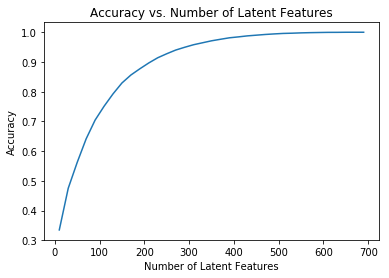

In [85]:
num_latent_feats = np.arange(10,700+10,20)
sum_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    # take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
    diffs = np.subtract(user_item_matrix, user_item_est)
    
    # total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)
    
    
plt.plot(num_latent_feats, 1 - np.array(sum_errs)/df.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

### <a class="anchor" id="Matrix-Fact">Part IV: Conclusion</a>

Further work on single value decomposition will be added with an attempt to predict possible interactions of any given user
and the articles in the platform. Through this, I can figure out a way to tackle the cold start problem which occurs 
when there is a need to make recommendation for any new user who has not had any interaction in the platform and so 
do not have similar users. For now, I will recommend the most popular articles to new users in the platform.